<a href="https://colab.research.google.com/github/ArezooRezvani/project6220/blob/main/6220Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
<ipython-input-1-c0e66ccc3b78>:46: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


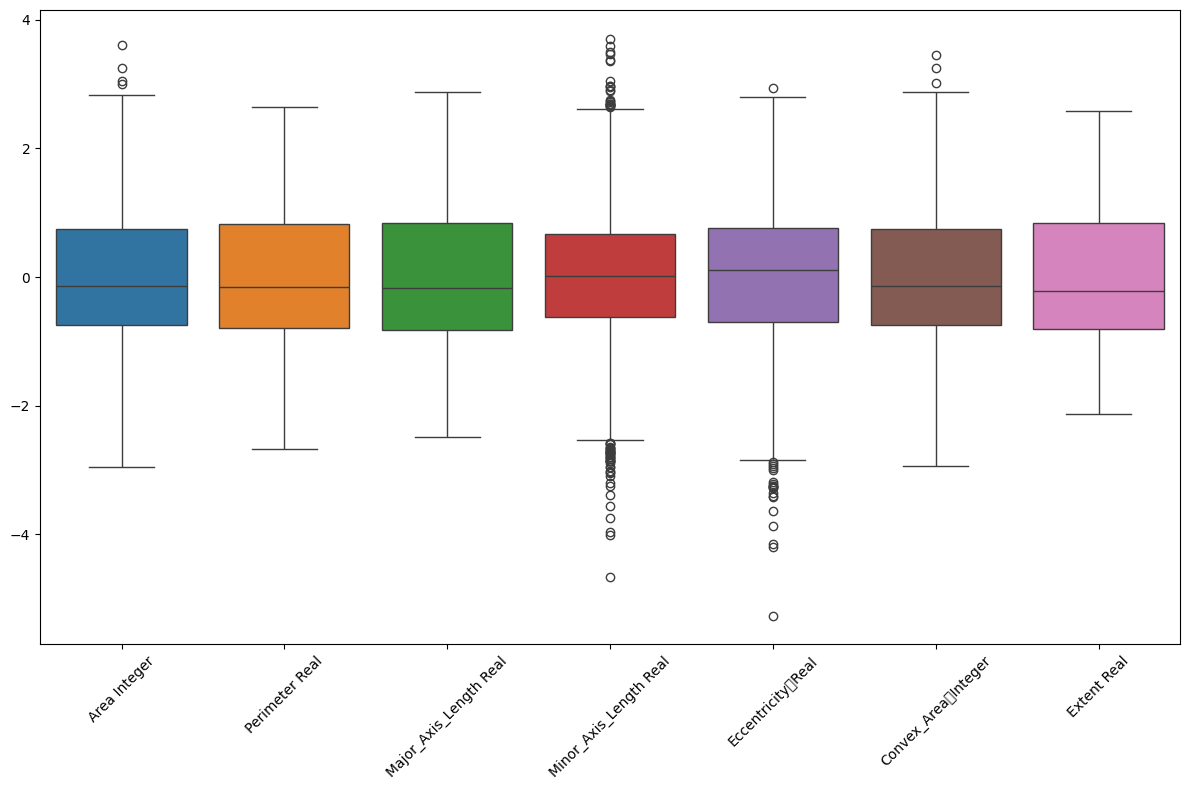

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


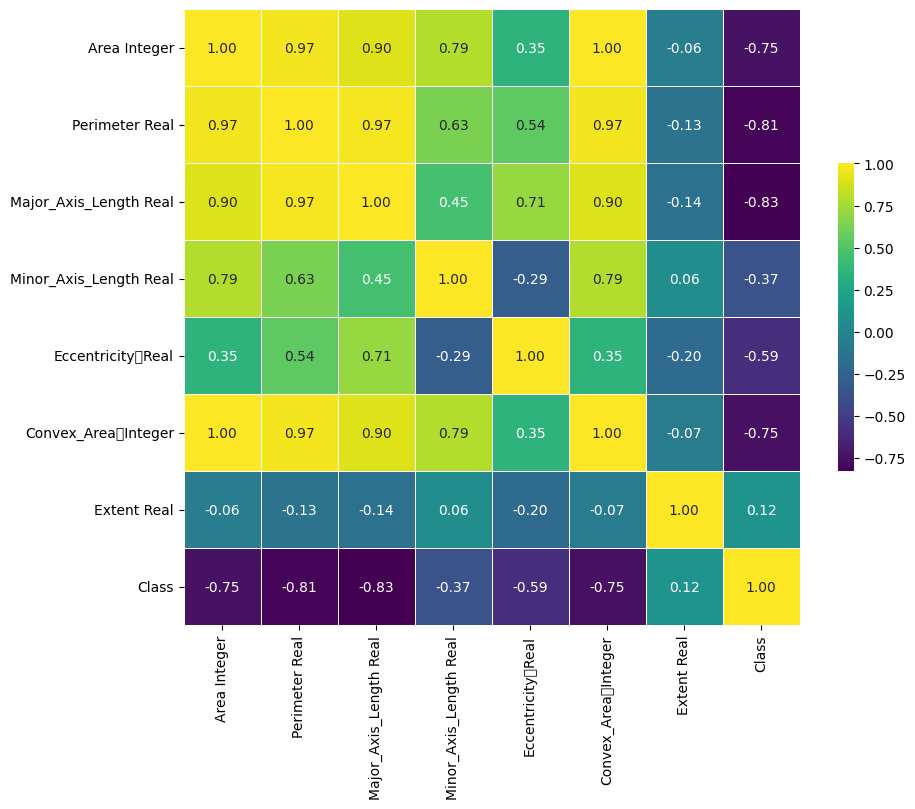

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


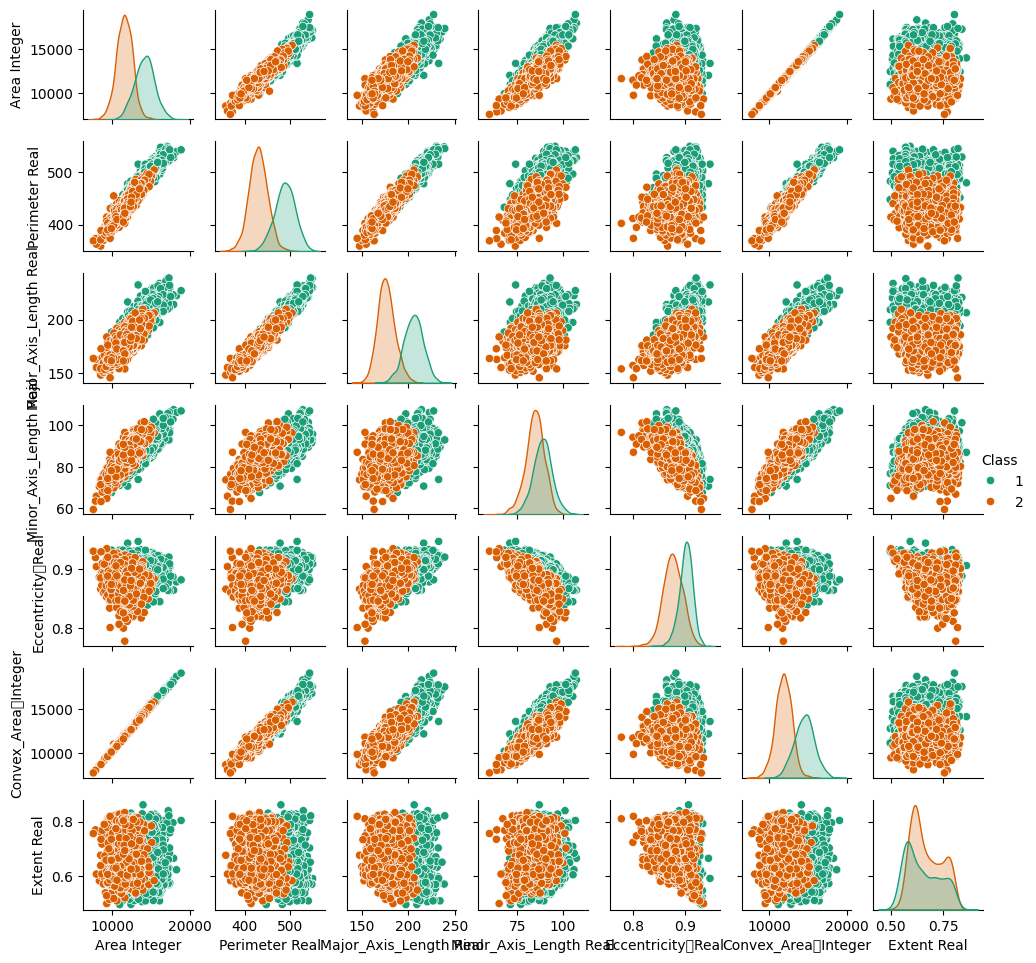

Eigenvalues:
[4.58e+00 1.50e+00 9.01e-01 1.20e-02 6.00e-03 2.00e-03 0.00e+00]

Eigenvectors:
[[ 0.461  0.464  0.447  0.322  0.227  0.462 -0.058]
 [-0.124  0.056  0.213 -0.567  0.673 -0.123 -0.382]
 [-0.013  0.028  0.122 -0.213  0.298 -0.017  0.922]
 [-0.335  0.689  0.241 -0.328 -0.482 -0.123  0.02 ]
 [ 0.372 -0.475  0.526 -0.427 -0.409  0.095 -0.014]
 [ 0.194  0.126 -0.582 -0.476 -0.078  0.613  0.002]
 [ 0.695  0.253 -0.259 -0.115 -0.016 -0.61   0.003]]


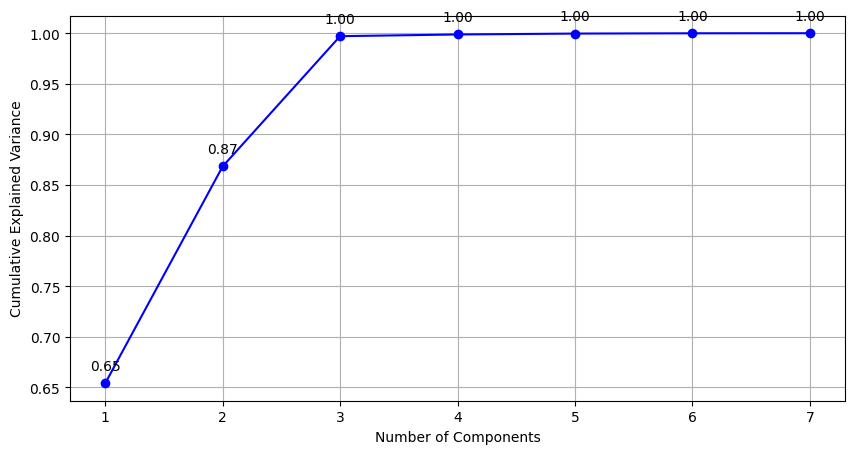

[6.54139894e-01 2.14251238e-01 1.28686487e-01 1.67940162e-03
 8.88093573e-04 2.93237734e-04 6.16482261e-05]


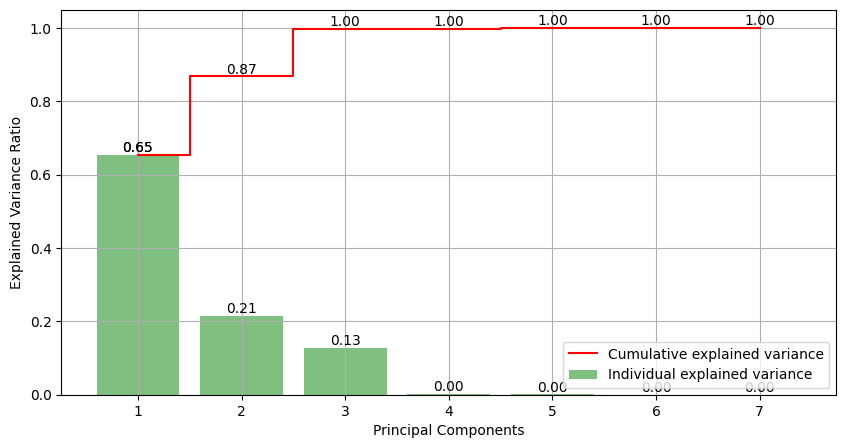

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


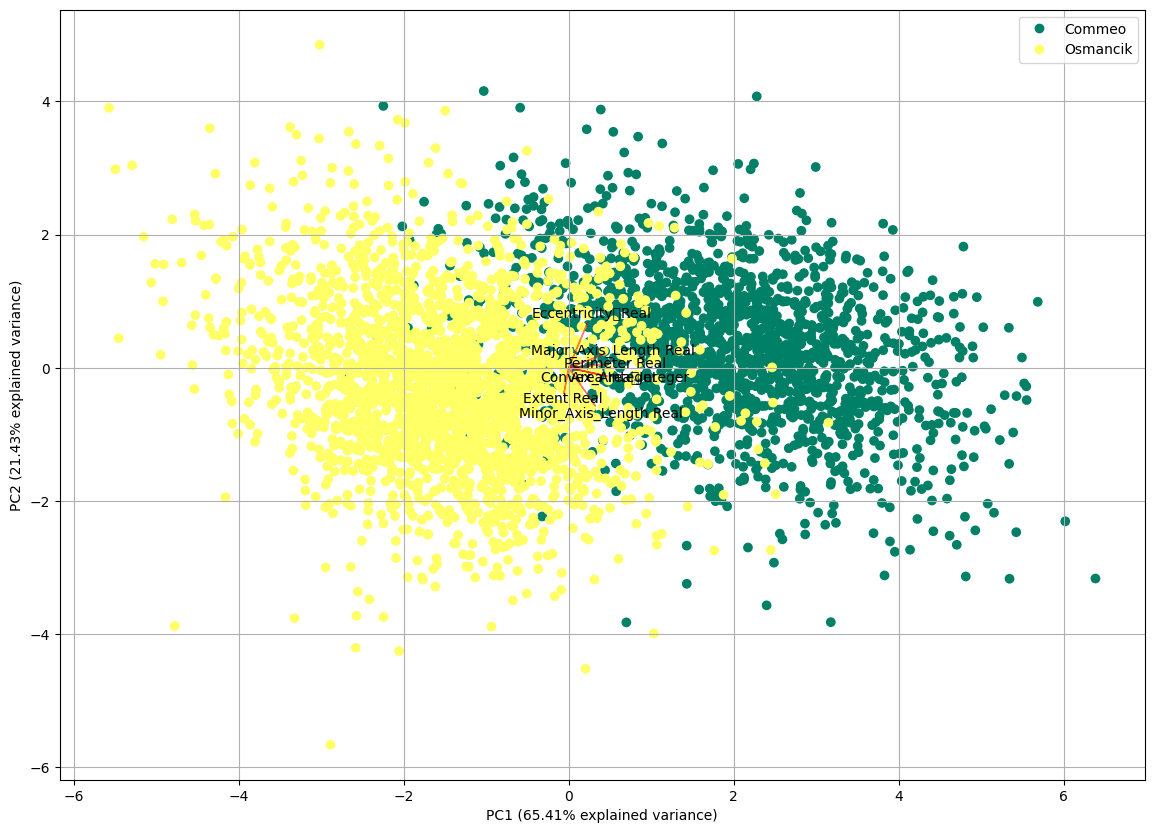

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


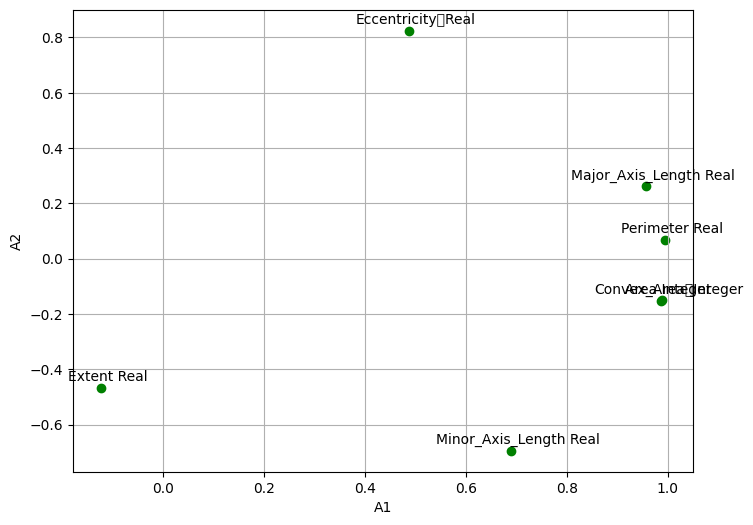

Explained variance by PCA components: [0.65427452 0.213663  ]


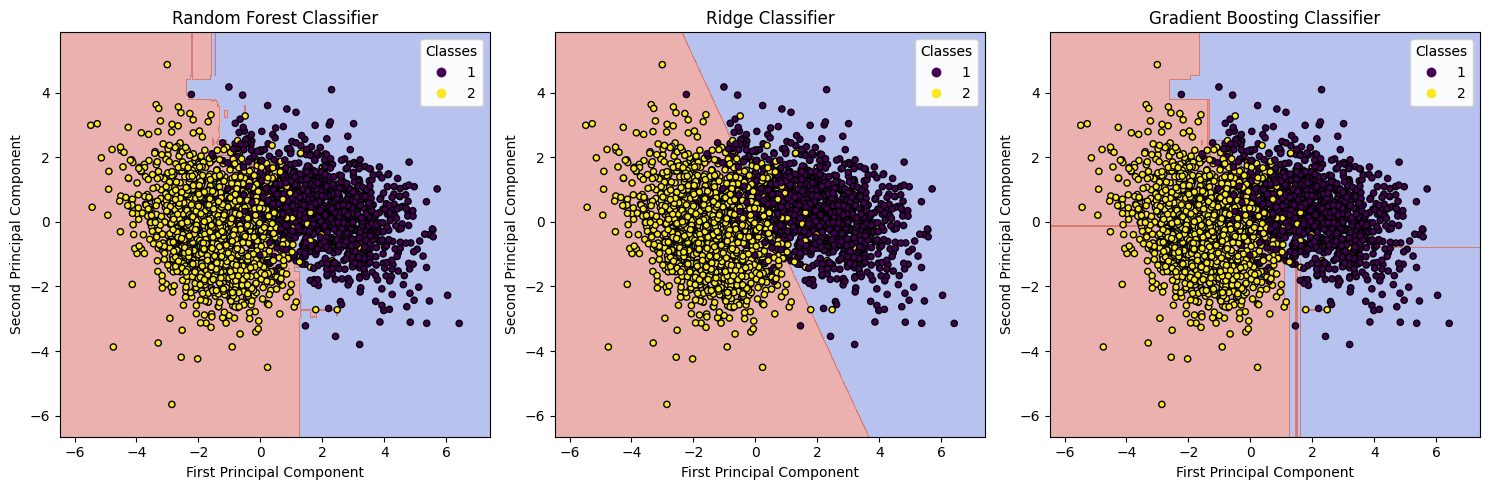

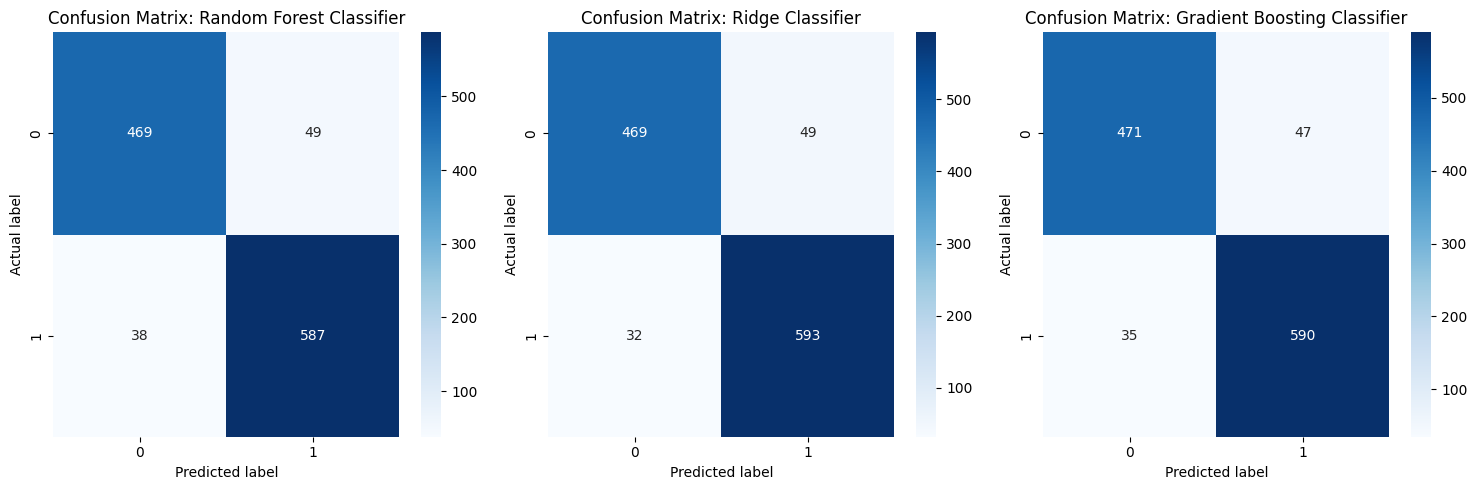


Model Performance Metrics:
Random Forest Classifier: Precision = 0.92, Recall = 0.92, F1 = 0.92
Ridge Classifier: Precision = 0.93, Recall = 0.93, F1 = 0.93
Gradient Boosting Classifier: Precision = 0.93, Recall = 0.93, F1 = 0.93


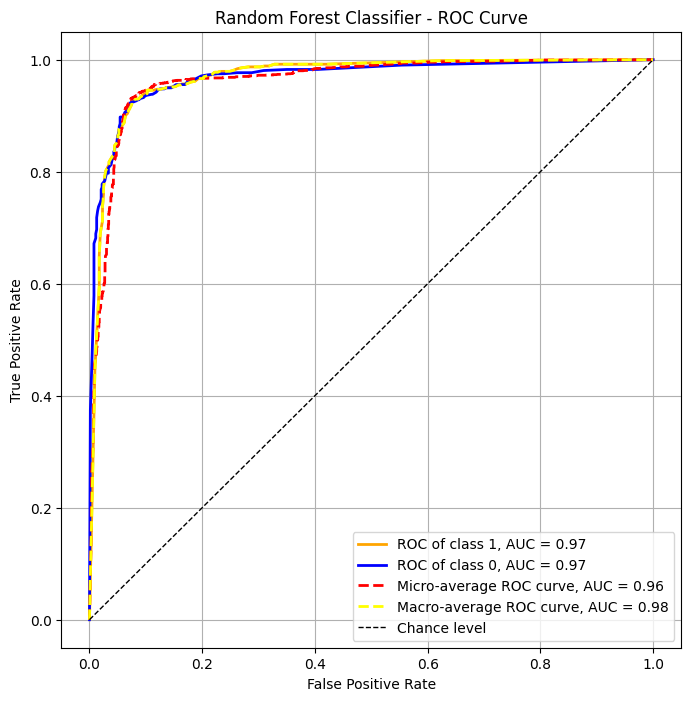

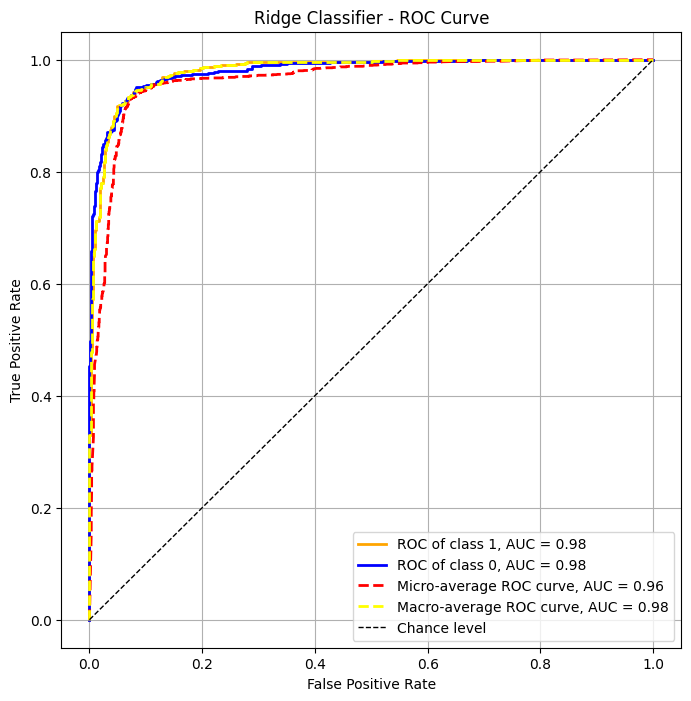

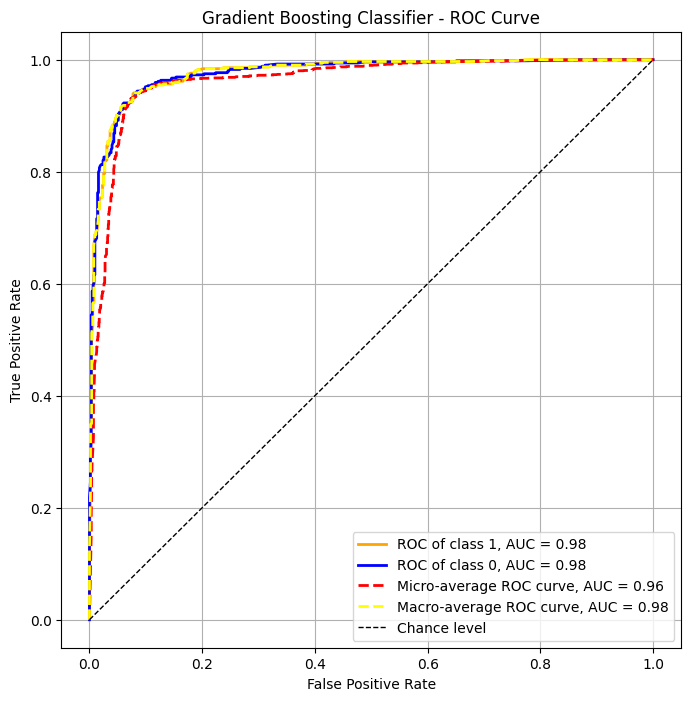

Initializing Gradient Boosting Classifier


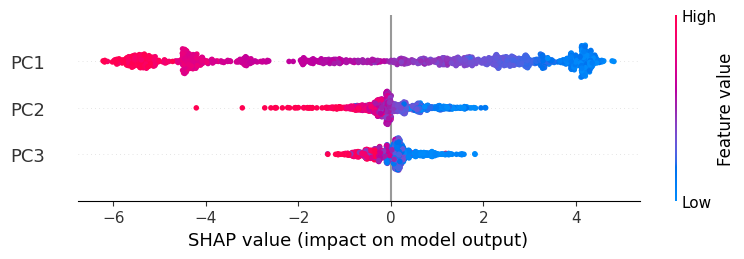

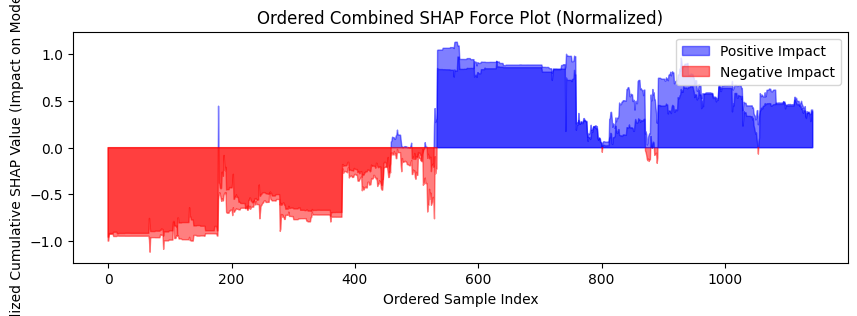

Training models without PCA...

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1555, number of negative: 1112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2667, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.583052 -> initscore=0.335315
[LightGBM] [Info] Start training from score 0.335315
Results without PCA:
                              Model  Accuracy       AUC    Recall  Precision  \
0                             Dummy  0.546807       0.5  0.000000   0.000000   
1               Logistic Regression  0.932633  0.981955  0.905405   0.943662   
2                     Decision Tree  0.888014  0.884049  0.841699   0.904564   
3      Linear Discriminant Analysis  0.930884  0.981683  0.

In [ ]:

from scipy.cluster.hierarchy import linkage, leaves_list
import shap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score,
                             recall_score, f1_score, cohen_kappa_score, matthews_corrcoef)
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

# Load the dataset
url ="https://raw.githubusercontent.com/ArezooRezvani/project6220/refs/heads/main/Rice.csv"
data = pd.read_csv(url)

# ************************************************************************************BoxPlot
# Separate features from the target
X = data.drop('Class', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Draw boxplots for each variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_scaled_df)  # Using only feature data
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()
# ************************************************************************************Correlation
# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap without the mask and with correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()
# ************************************************************************************Pairplot
# Select all columns except 'Outcome'
columns_to_plot = data.columns.drop('Class')

# Create a pairplot with KDEs on the diagonal and use the 'Outcome' column as the hue
pair_plot = sns.pairplot(data, vars=columns_to_plot, hue='Class', diag_kind='kde', palette="Dark2")

# Increase figure size to make room for axis labels
pair_plot.fig.set_size_inches(10, 10)

# Adjust layout to fit the figure area and prevent label overlap
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.2, wspace=0.2)

# Display the plot
plt.show()

# ************************************************************************************Eigen
def pca_with_sklearn(url):
    # Load the dataset
    data = pd.read_csv(url)

    # Assuming the last column is the target and the rest are features
    # Modify if different
    X = data.drop(columns=['Class'])  # drop the target column if named 'Outcome'

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA()
    pca.fit(X_scaled)

    # Eigenvalues and Eigenvectors
    eigenvalues = pca.explained_variance_
    eigenvectors = pca.components_

    # Round the eigenvalues and eigenvectors to three decimal places
    eigenvalues_rounded = np.round(eigenvalues, 3)
    eigenvectors_rounded = np.round(eigenvectors, 3)

    return eigenvalues_rounded, eigenvectors_rounded


# Usage with your dataset
eigenvalues, eigenvectors = pca_with_sklearn(
     "https://raw.githubusercontent.com/ArezooRezvani/project6220/refs/heads/main/Rice.csv")

# Printing the results
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# ************************************************************************************scree pareto



# Assuming the last column is the target variable and others are features
X = data.drop(columns=[data.columns[-1]])  # drop the last column if it's the target
y = data[data.columns[-1]]

# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), color="blue", marker='o')
for i, v in enumerate(np.cumsum(explained_variance)):
    plt.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')  # Adjust positioning and formatting as needed
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
print(explained_variance)

# Pareto Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', color="green", label='Individual explained variance')
steps = plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', color="red", label='Cumulative explained variance')

# Annotating individual bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha='center', va='bottom')

# Annotating step values
for i, value in enumerate(np.cumsum(explained_variance)):
    plt.text(i + 1, value, f"{value:.2f}", ha='center', va='bottom')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()
# ************************************************************************************ Biplot
# Separate the features from the target if needed
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Create a PCA instance: PCA for 2 components
pca = PCA(n_components=2)

# Fit and transform the data
principalComponents = pca.fit_transform(X_std)
explained_variance_ratio = pca.explained_variance_ratio_
# Get the explained variance ratio for the first two principal components

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

# Plot the PCA components as a scatter plot
plt.figure(figsize=(14, 10))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='summer')
# Plot the feature vectors based on loadings
for i, feature in enumerate(data.columns[:-1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, feature, color='black', ha='center', va='center')

# Create legend for the 'Outcome' categories
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markersize=10, markerfacecolor='blue', alpha=0.5),
                   Line2D([0], [0], marker='o', color='w',
                          markersize=10, markerfacecolor='green', alpha=0.5)]
plt.legend(handles=scatter.legend_elements()[0], labels=['Commeo', 'Osmancik'])
# Set labels with the explained variance
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} explained variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} explained variance)')
plt.grid(True)
# Show the plot
plt.show()

# ************************************************************************************ Biplot


np.random.seed(0)  # Ensures consistency if there's any underlying randomness

# Load data from the URL



# Exclude the 'Outcome' column and include only numeric columns for PCA
X = data.drop(columns=['Class']).select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Get the loadings for the first two principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


# Plot the PCA coefficient plot
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='Green')
plt.xlabel('A1')
plt.ylabel('A2')
plt.grid(True)  # Enable grid
# Annotate the points with the variable names
for i, txt in enumerate(X.columns):
    plt.annotate(txt, (loadings[i, 0], loadings[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')
plt.show()




# ************************************************************************************ desicion

# Define X and y
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Scale the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Check the explained variance
print(f"Explained variance by PCA components: {pca.explained_variance_ratio_}")

# Initialize classifiers
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

# Function for plotting decision boundaries
def plot_decision_boundaries(X, y, classifier_dict, h=0.01):
    plt.figure(figsize=(15, 5))
    for i, (name, clf) in enumerate(classifier_dict.items(), 1):
        plt.subplot(1, len(classifier_dict), i)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Predict the regions
        try:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
        except Exception as e:
            print(f"Error for {name} during decision boundary plotting: {e}")
            continue

        # Scatter plot for training data
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
        plt.title(name)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
        plt.gca().add_artist(legend1)
    plt.tight_layout()
    plt.show()

# Function to plot confusion matrices
def plot_confusion_matrices(X_test, y_test, classifier_dict):
    plt.figure(figsize=(15, 5))
    for i, (name, clf) in enumerate(classifier_dict.items(), 1):
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm)
        plt.subplot(1, len(classifier_dict), i)
        sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
        plt.title(f'Confusion Matrix: {name}')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Fit the models with the PCA-transformed data
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)

# Plot decision boundaries
plot_decision_boundaries(X_train_pca, y_train, classifiers, h=0.01)

# Plot confusion matrices
plot_confusion_matrices(X_test_pca, y_test, classifiers)

# Print out precision and recall for each classifier
results_list_pca = []
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_pca)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    results_list_pca.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

# Display results
print("\nModel Performance Metrics:")
for result in results_list_pca:
    print(f"{result['Model']}: Precision = {result['Precision']:.2f}, Recall = {result['Recall']:.2f}, F1 = {result['F1']:.2f}")


# ************************************************************************************ ROC


# Define X and y
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Relabel the target variable to {0, 1}
y = np.where(y == 2, 1, 0)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply PCA to reduce dimensions for visualization purposes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize classifiers
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

# Train classifiers
for clf in classifiers.values():
    clf.fit(X_train_pca, y_train)

# Function to plot ROC curve for each classifier
def plot_individual_roc_curves(X_test, y_test, classifiers):
    # Micro and Macro average calculations
    y_true_aggregate = np.array([])
    y_scores_aggregate = np.array([])
    aucs = []

    for name, clf in classifiers.items():
        # Handle models with and without predict_proba
        if hasattr(clf, "predict_proba"):  # For models with predict_proba
            y_score = clf.predict_proba(X_test)[:, 1]
        else:  # For models without predict_proba (e.g., Ridge Classifier)
            y_score = clf.decision_function(X_test)
            y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())  # Scale to [0, 1]

        y_true_aggregate = np.append(y_true_aggregate, y_test)
        y_scores_aggregate = np.append(y_scores_aggregate, y_score)
        aucs.append(auc(*roc_curve(y_test, y_score)[:2]))

    # Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_true_aggregate, y_scores_aggregate)
    roc_auc_micro = auc(fpr_micro, tpr_micro)

    # Macro-average ROC
    roc_auc_macro = np.mean(aucs)

    # Plot for each classifier
    for name, clf in classifiers.items():
        plt.figure(figsize=(8, 8))
        if hasattr(clf, "predict_proba"):  # For models with predict_proba
            y_score = clf.predict_proba(X_test)[:, 1]
        else:  # For models without predict_proba
            y_score = clf.decision_function(X_test)
            y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())  # Scale to [0, 1]

        # ROC Curve for Class 1
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        # ROC Curve for Class 0
        y_test_class0 = 1 - y_test  # Invert class labels for Class 0
        if hasattr(clf, "predict_proba"):
            y_score_class0 = clf.predict_proba(X_test)[:, 0]
        else:
            y_score_class0 = -clf.decision_function(X_test)  # Negate decision scores for Class 0
            y_score_class0 = (y_score_class0 - y_score_class0.min()) / (y_score_class0.max() - y_score_class0.min())

        fpr_class0, tpr_class0, _ = roc_curve(y_test_class0, y_score_class0)
        roc_auc_class0 = auc(fpr_class0, tpr_class0)

        # Plot ROC curves
        plt.plot(fpr, tpr, label=f'ROC of class 1, AUC = {roc_auc:.2f}', color='orange', lw=2)
        plt.plot(fpr_class0, tpr_class0, label=f'ROC of class 0, AUC = {roc_auc_class0:.2f}', color='blue', lw=2)

        # Micro and Macro ROC
        plt.plot(fpr_micro, tpr_micro, color='red', linestyle='--', lw=2, label=f'Micro-average ROC curve, AUC = {roc_auc_micro:.2f}')
        plt.plot(fpr, tpr, color='yellow', linestyle='--', lw=2, label=f'Macro-average ROC curve, AUC = {roc_auc_macro:.2f}')

        # Chance line
        plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--', label='Chance level')

        # Final plot adjustments
        plt.title(f'{name} - ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.grid(True)

        plt.show()

# Call the function
plot_individual_roc_curves(X_test_pca, y_test, classifiers)


# ************************************************************************************ summary plot


# Define X and y
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Optionally apply PCA to reduce dimensions for visualization purposes
# Optionally apply PCA to reduce dimensions for visualization purposes
pca = PCA(n_components=3)  # Change here to include 3 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train a Gradient Boosting classifier
print("Initializing Gradient Boosting Classifier")
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train_pca, y_train)

# Create a Tree SHAP explainer and explain the model's predictions
explainer = shap.TreeExplainer(gradient_boosting)
shap_values = explainer.shap_values(X_test_pca)

# Ensure you're passing the correct SHAP values array
if isinstance(shap_values, list):
    # For binary classification, index 1 is typically used for the positive class
    shap.summary_plot(shap_values[1], X_test_pca, feature_names=['PC1', 'PC2', 'PC3'])  # Updated feature names
else:
    # Handle other cases, though for binary classification this part may not be necessary
    shap.summary_plot(shap_values, X_test_pca, feature_names=['PC1', 'PC2', 'PC3'])


# ************************************************************************************ force plot


# Define X and y
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply PCA to reduce dimensions for visualization purposes
pca = PCA(n_components=2)  # Adjusting to 2 components since your SHAP plotting code handles 2 features
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train a Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train_pca, y_train)

# Create a SHAP TreeExplainer using the trained model
explainer = shap.TreeExplainer(gradient_boosting)

# Select a specific observation to explain
observation_index = 40  # You can change this index to choose a different observation
single_observation = X_test_pca[observation_index]

# Compute SHAP values for the selected observation
shap_values_single = explainer.shap_values(single_observation)

# Generate the force plot using the correct expected value and SHAP values
expected_value = explainer.expected_value[0]  # Use the only item for the force plot
shap.force_plot(expected_value, shap_values_single, features=single_observation, feature_names=['PC1', 'PC2'])
# Generate the force plot using the correct expected value and SHAP values
expected_value = explainer.expected_value[0]  # Use the only item for the force plot
force_plot = shap.force_plot(expected_value, shap_values_single, features=single_observation, feature_names=['PC1', 'PC2'], show=False)
# Save the plot to an HTML file
shap.save_html("force_plot.html", force_plot)


# ************************************************************************************ Combined force plot

X = data.drop('Class', axis=1).values
y = data['Class'].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Dimensionality reduction
pca = PCA(n_components=2)  # Use two principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train_pca, y_train)

# SHAP value calculation using the trained model
explainer = shap.TreeExplainer(gradient_boosting)
shap_values = explainer.shap_values(X_test_pca)

# Handling binary classification focus on the positive class
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Hierarchical clustering of SHAP values to order by similarity
Z = linkage(shap_values, 'ward')
sorted_idx = leaves_list(Z)

# Reorder SHAP values
shap_values_sorted = shap_values[sorted_idx]

# Normalize SHAP values separately for positive and negative
max_pos_shap = np.max(shap_values_sorted, axis=0)
max_neg_shap = np.min(shap_values_sorted, axis=0)
normalized_pos_shap = np.clip(shap_values_sorted / max_pos_shap, 0, 1)
normalized_neg_shap = np.clip(shap_values_sorted / -max_neg_shap, -1, 0)

# Combined normalized SHAP values, ensuring negative values do not exceed zero
normalized_shap_values = np.where(shap_values_sorted > 0, normalized_pos_shap, normalized_neg_shap)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 3))
base_shap = np.zeros(normalized_shap_values.shape[0])

# Calculate and plot cumulative normalized SHAP values
cumulative_shap = np.cumsum(normalized_shap_values, axis=1)

for i in range(normalized_shap_values.shape[1]):
    ax.fill_between(range(len(normalized_shap_values)), base_shap, cumulative_shap[:, i],
                    where=cumulative_shap[:, i] >= base_shap, color='blue', alpha=0.5, interpolate=True,
                    label='Positive Impact' if i == 0 else None)
    ax.fill_between(range(len(normalized_shap_values)), base_shap, cumulative_shap[:, i],
                    where=cumulative_shap[:, i] <= base_shap, color='red', alpha=0.5, interpolate=True,
                    label='Negative Impact' if i == 0 else None)

ax.set_xlabel('Ordered Sample Index')
ax.set_ylabel('Normalized Cumulative SHAP Value (Impact on Model Output)')
plt.title('Ordered Combined SHAP Force Plot (Normalized)')

# Add legend
ax.legend()

plt.show()
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score, precision_score, f1_score,
                             cohen_kappa_score, matthews_corrcoef)
from sklearn.decomposition import PCA
from time import time
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)  # Suppress undefined metric warnings

# Load dataset
url = "https://raw.githubusercontent.com/ArezooRezvani/project6220/refs/heads/main/Rice.csv"
data = pd.read_csv(url)

# Define X and y
X = data.drop('Class', axis=1)
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classifiers with necessary parameters fixed
classifiers = {
    'Dummy': DummyClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Ada Boost Classifier': AdaBoostClassifier(algorithm='SAMME'),
    'Ridge Classifier': RidgeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Light Gradient Boosting Machine': LGBMClassifier(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'SVM - Linear Kernel': SVC(kernel='linear', probability=True)
}


# Function for safe precision computation
def safe_precision(y_true, y_pred):
    return precision_score(y_true, y_pred, zero_division=0)


# Results list for non-PCA
results_list = []
print("Training models without PCA...\n")
for name, clf in classifiers.items():
    start_time = time()
    clf.fit(X_train, y_train)
    end_time = time()
    training_time = end_time - start_time

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    results_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A",
        'Recall': recall_score(y_test, y_pred),
        'Precision': safe_precision(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'Kappa': cohen_kappa_score(y_test, y_pred),
        'MCC': matthews_corrcoef(y_test, y_pred),
        'TT (Sec)': training_time
    })

# Display results without PCA
results_df = pd.DataFrame(results_list)
print("Results without PCA:")
print(results_df)

# PCA Section
print("\nTraining models with PCA...\n")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

results_list_pca = []
for name, clf in classifiers.items():
    try:
        start_time = time()
        clf.fit(X_train_pca, y_train)
        end_time = time()
        training_time = end_time - start_time

        y_pred = clf.predict(X_test_pca)
        y_proba = clf.predict_proba(X_test_pca)[:, 1] if hasattr(clf, "predict_proba") else None

        results_list_pca.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A",
            'Recall': recall_score(y_test, y_pred),
            'Precision': safe_precision(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'Kappa': cohen_kappa_score(y_test, y_pred),
            'MCC': matthews_corrcoef(y_test, y_pred),
            'TT (Sec)': training_time
        })
    except Exception as e:
        print(f"Classifier {name} failed with error: {e}")

# Display results with PCA
results_df_pca = pd.DataFrame(results_list_pca)
print("Results with PCA:")
print(results_df_pca)